In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("NCDB_1999_to_2017.csv", dtype=object)
df = df.sample(600000,axis=0)
y = df["C_CONF"].to_frame()
X = df.drop(["C_CONF","V_ID","C_CASE","C_CONF","C_HOUR", "C_WDAY", "C_MNTH"], axis=1)
yfnp = y.values.tolist()
dfnp = X.to_numpy()
xch = X.columns.values.tolist()
ych = y.columns.values.tolist()
cdata = np.ones((dfnp.shape[0], dfnp.shape[1]))


for i in range(dfnp.shape[1]):
    ti = Tokenizer()
    ti.fit_on_texts(dfnp[:,i])
    cdata[:,i] = np.array(ti.texts_to_sequences(dfnp[:,i])).reshape(1,-1)

#ti = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
#ti.fit_on_texts(dfnp)
#cdata = ti.texts_to_sequences(dfnp)
#cdata = keras.preprocessing.sequence.pad_sequences(cdata)
#sc = MinMaxScaler(feature_range=(0, 1))
#cdata = sc.fit_transform(cdata)
Xf = pd.DataFrame(data=cdata,columns=xch,dtype =float)
to = Tokenizer()
to.fit_on_texts(yfnp)
ydata = to.texts_to_sequences(yfnp)
yf = np.array(ydata)
yf1 = keras.utils.to_categorical(yf)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

180/180 [==============================] - 2s 11ms/step - loss: 2.4285 - categorical_accuracy: 0.2971 - val_loss: 2.3785 - val_categorical_accuracy: 0.3026

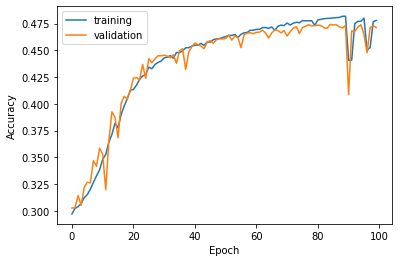

In [60]:
model = keras.Sequential()
#model.add(keras.layers.Conv2D(64,(3,3), activation="relu"))
#model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(50, activation="sigmoid"))
model.add(keras.layers.Dense(21, activation="softmax"))
opt = keras.optimizers.Adagrad(learning_rate=1)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

fitted = model.fit(Xf,yf1, epochs=100,batch_size=1000, validation_split=0.7)
plt.plot(fitted.history["categorical_accuracy"])
plt.plot(fitted.history["val_categorical_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training", "validation"], loc="upper left")
plt.show()
